In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm
import random

In [2]:
ArtBank = 'images'
Art_Categories = ['abstract','animal-painting','cityscape','flower-painting','landscape', 'portrait', 'still-life']
Image_size=70#70

In [5]:
training_data=[]
def creating_training_data():
    for category in Art_Categories:
        path=os.path.join(ArtBank, category)
        class_num=Art_Categories.index(category)
        i=0
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(Image_size,Image_size))
                training_data.append([new_array/255,class_num])#divided by 255
            except Exception as e:
                pass
            if i==999:#999
                break
            i+=1

creating_training_data()

In [1]:
#Display images after changing the dimensions
plt.figure(figsize=(8,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(training_data[3*i+2][0])
    ri = random.randint(0, len(Art_Categories))
    plt.title(Art_Categories[training_data[3*i+2][ri]])

NameError: name 'plt' is not defined

In [7]:
#seperating the images and the labels
lenofimage = len(training_data)
X_Images=[]
y_Labels=[]

for categories, label in training_data:
    X_Images.append(categories)
    y_Labels.append(label)
X_Images= np.array(X_Images).reshape(lenofimage,-1)
#X = X/255.0
y_Labels=np.array(y_Labels)

In [8]:
#test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Images,y_Labels, test_size=0.2, random_state=42)

In [9]:
#set up the model
from sklearn.svm import SVC
svc = SVC(kernel='rbf',gamma='auto')
svc.fit(X_train, y_train)

In [ ]:
#predict labels for test data
y2 = svc.predict(X_test)

In [ ]:
y2.shape


In [ ]:
#Calculate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy on training data is",accuracy_score(y_test,y2))

In [ ]:
#Precision recall and F1
from sklearn.metrics import classification_report
print("Accuracy on training data is",classification_report(y_test,y2))

In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_u = to_categorical(y_test, num_classes = len(Art_Categories))
import seaborn as sns

Y_true = np.argmax(y_u,axis = 1) 

confusion_matrix_1 = confusion_matrix(Y_true, y2) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_matrix_1, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [2]:
#imports used for next section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm
# import tensorflow as tf

In [33]:
#Stroing the images as matrices with 3 components one for each colour aspect
Art_Categories = ['abstract','animal-painting','cityscape','flower-painting','landscape', 'portrait', 'still-life']
Image_size=70
training_data=[]
def creating_training_data():
    for category in Art_Categories:
        path=os.path.join(ArtBank, category)
        class_num=Art_Categories.index(category)
        i=0
        ld = os.listdir(path)
        for img in ld:
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(Image_size,Image_size))
                training_data.append([new_array/255,class_num])#divided by 255
            except Exception as e:
                pass
            # if i==999:#999
                # break
            if i%(len(ld) / 10)==0:
                print(i,':',end="")
            i+=1

creating_training_data()

0 :0 :0 :660 :1320 :1980 :2640 :3300 :3960 :4620 :5280 :5940 :0 :180 :360 :540 :720 :900 :1080 :1260 :1440 :1620 :0 :1500 :3000 :4500 :6000 :7500 :9000 :10500 :12000 :13500 :0 :1500 :3000 :4500 :6000 :7500 :9000 :10500 :12000 :13500 :0 :300 :600 :900 :1200 :1500 :1800 :2100 :2400 :2700 :

In [34]:
#split the images from the labels
Xr_images = []
yr_labels = []
for categories, label in training_data:
    Xr_images.append(categories)
    yr_labels.append(label)


In [35]:
#Test train split
X_Images = np.array(Xr_images, dtype = 'float32')
from tensorflow.keras.utils import to_categorical 
y_Labels = to_categorical(yr_labels, num_classes = len(Art_Categories))
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_Images, y_Labels, test_size=0.125, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=(0.1428), random_state=1) # 0.111 x 0.9 = 0.1
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)


x_train shape (43664, 70, 70, 3)
x_test shape (7275, 70, 70, 3)
y_train shape (43664, 7)
y_test shape (7275, 7)


In [36]:
#Define neural networks structure
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (Image_size,Image_size,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(len(Art_Categories), activation = "softmax"))

c:\Users\Mike\Studio\inteligencja-obliczeniowa\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
#The choice of gradient descent
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [38]:
#Choosing our loss function
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [39]:
epochs = 25  # optimal choice
batch_size = 128

In [40]:
#Show how validation loss changes
history = model.fit(X_train,Y_train,
                    epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/25
339/341 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.4872 - loss: 1.4221

c:\Python39\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


341/341 ━━━━━━━━━━━━━━━━━━━━ 43s 123ms/step - accuracy: 0.4876 - loss: 1.4212 - val_accuracy: 0.6173 - val_loss: 1.1026
Epoch 2/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 41s 120ms/step - accuracy: 0.6219 - loss: 1.0935 - val_accuracy: 0.6449 - val_loss: 1.0304
Epoch 3/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 43s 125ms/step - accuracy: 0.6409 - loss: 1.0293 - val_accuracy: 0.6605 - val_loss: 0.9718
Epoch 4/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 44s 128ms/step - accuracy: 0.6531 - loss: 0.9923 - val_accuracy: 0.6625 - val_loss: 0.9804
Epoch 5/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 43s 126ms/step - accuracy: 0.6673 - loss: 0.9507 - val_accuracy: 0.6753 - val_loss: 0.9386
Epoch 6/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 43s 127ms/step - accuracy: 0.6772 - loss: 0.9248 - val_accuracy: 0.6753 - val_loss: 0.9353
Epoch 7/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 44s 128ms/step - accuracy: 0.6812 - loss: 0.9112 - val_accuracy: 0.6849 - val_loss: 0.9120
Epoch 8/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 43s 127ms/step - accuracy: 0.6927 - loss: 0.8747 - val

In [41]:
model.save('Art_Classification.h5')
model.save('Art_Classification.keras')

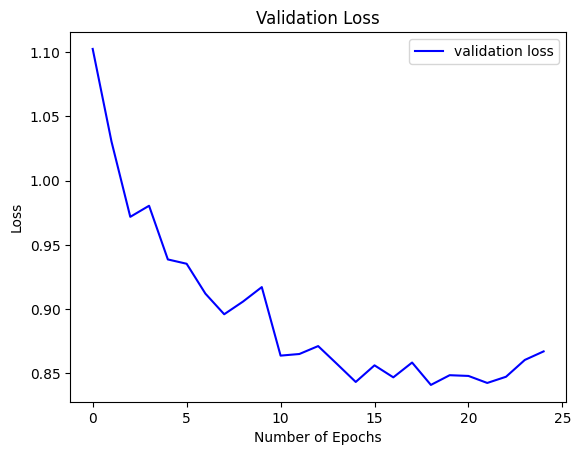

In [42]:
#Plot validation loss
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

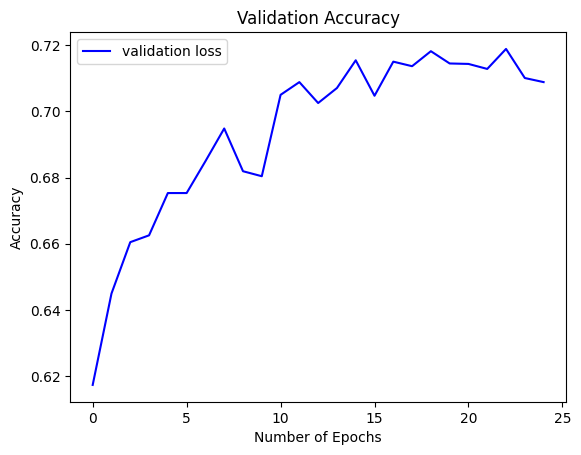

In [43]:
plt.plot(history.history['val_accuracy'], color='b', label="validation loss")
plt.title("Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


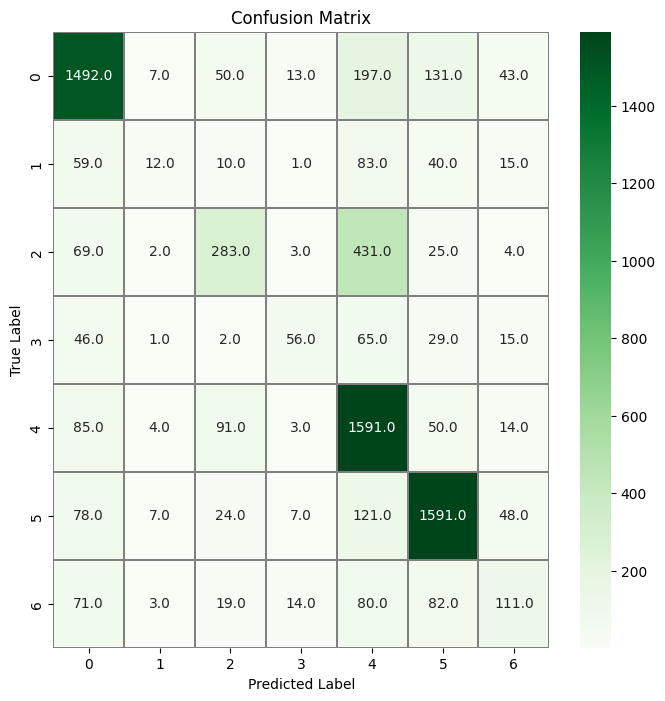

In [44]:
#Confusion matrix
import seaborn as sns

Y_pred = model.predict(X_test)
 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

Y_true = np.argmax(Y_test,axis = 1) 

confusion_matrix_1 = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_matrix_1, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [47]:
from sklearn.metrics import accuracy_score
print("Accuracy on training data is",accuracy_score(Y_true,Y_pred_classes))


Accuracy on training data is 0.7056883759274526


In [3]:
from tensorflow.keras.models import load_model
loadedModel = load_model('Art_Classification.keras')

c:\Users\Mike\Studio\inteligencja-obliczeniowa\.venv\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [1]:
# img_array=cv2.imread(os.path.join(path,img))
#                 new_array=cv2.resize(img_array,(Image_size,Image_size))
#                 training_data.append([new_array/255,class_num])
                
# plt.figure(figsize=(8,6))
# for i in range(5):
#     plt.subplot(2,3,i+1)
#     plt.imshow(training_data[3*i+2][0])
#     plt.title(Art_Categories[training_data[3*i+2][1]])

sample_test = X_test.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(X_test[3*i+2][0])
    plt.title(Art_Categories[X_test[3*i+2][1]])
    plt.subplot(6, 3, i+1)
    # plt.imshow()
    plt.xlabel("{}".format(Art_Categories[Y_pred[3*i+2]]))
plt.tight_layout()
plt.show()

NameError: name 'X_test' is not defined